In [26]:
using DifferentialEquations, ModelingToolkit, Plots

In [27]:
@parameters t g e a d
@variables x(t) y(t) 


2-element Vector{Num}:
 x(t)
 y(t)

In [28]:
D = Differential(t)

eqs = [D(x) ~ (-g*x+e*x*y),
    D(y) ~ (a*y-d*x*y)]


2-element Vector{Equation}:
 Differential(t)(x(t)) ~ e*x(t)*y(t) - g*x(t)
 Differential(t)(y(t)) ~ a*y(t) - d*x(t)*y(t)

In [29]:
@named sys = ODESystem(eqs)
sys = structural_simplify(sys)


Model sys with 2 equations
States (2):
  x(t)
  y(t)
Parameters (4):
  g
  e
  a
  d
Incidence matrix:2×4 SparseArrays.SparseMatrixCSC{Num, Int64} with 6 stored entries:
 ×  ×  ×  ⋅
 ×  ×  ⋅  ×

In [30]:
begin
    using OrdinaryDiffEq
    p = [g => 0.37,
    e => 0.038,
    a => 0.36,
    d =>  0.037]
    u0 = [
    x => 9.0,
    y => 20.0]
    tspan = (0.0, 25.0)
    prob = ODEProblem(sys, u0, tspan, p)
    sol = solve(prob, Tsit5())
end;
      

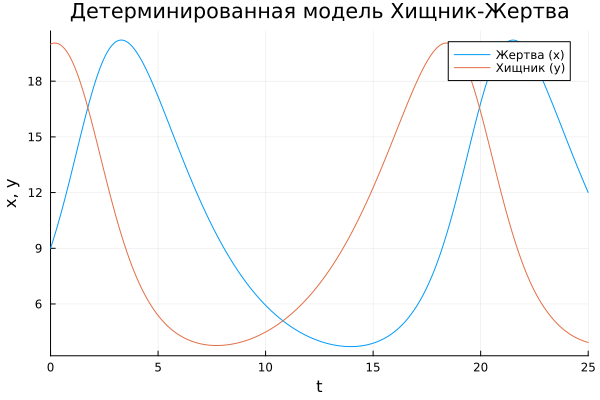

In [31]:

plot(sol, title = "Детерминированная модель Хищник-Жертва", xlabel = "t", ylabel = "x, y", label=["Жертва (x)" "Хищник (y)"])

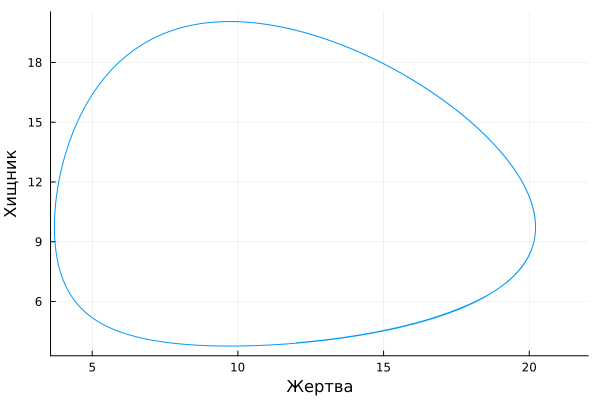

In [32]:
plot(sol, idxs=(1, 2), xaxis="Жертва", yaxis="Хищник",legend=false)

In [1]:
import Pkg; Pkg.add("StochasticDiffEq")

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 28, "Resolving timed out after 30001 milliseconds", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry /Users/julia/.julia/scratchspaces/a66863c6-20e8-4ff4-8a62-49f30b1f605e/agent-cache/default-macmini-x64-6.0/build/default-macmini-x64-6-0/julialang/julia-release-1-dot-8/usr/share/julia/stdlib/v1.8/Pkg/src/Registry/Registry.jl:68
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 28, "Resolving timed out after 30001 milliseconds", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry /Users/julia/.julia/scratchspaces/a66863c6-20e8-